In [483]:
import pandas as pd
import matplotlib.pyplot as plt

## Task 1: Get the data

In [484]:
import pickle

def load_data_pickle(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

data = load_data_pickle('dataset/disney_final_data.pickle')

df = pd.DataFrame(data, columns=['Title','Running time (min)', 'Budget (float)', 'Box office (float)', 'Release date (datetime)', 'imdb'])

df.head()

,Title,Running time (min),Budget (float),Box office (float),Release date (datetime),imdb
0,Academy Award Review of,41.0,NaN,4.547200e+01,1937-05-19,7.1
1,Snow White and the Seven Dwarfs,83.0,1490000.0,4.180000e+08,1937-12-21,7.6
2,Pinocchio,88.0,2600000.0,1.640000e+08,1940-02-07,7.4
3,Fantasia,126.0,2280000.0,8.330000e+07,1940-11-13,7.7
4,The Reluctant Dragon,74.0,600000.0,9.600000e+05,1941-06-27,6.9


### Clean a little bit more

In [485]:
# Delete the 'Zorro' series
df = df[df['Title'] != 'Zorro']

# Parse 'imdb' to numeric
df['imdb'] = pd.to_numeric(df['imdb'], errors='coerce')


In [493]:
# Movies with the same name now have the year in the title to differentiate

def get_year(date):
    return date.year

# Filter is used to pick the groups with more than 1 elements, getting the movies with the same titles
df.groupby(['Title']).filter(lambda x: len(x) > 1)
for index, movie in df.groupby(['Title']).filter(lambda x: len(x) > 1).iterrows():
    movie_has_date = not pd.isna(movie['Release date (datetime)'])
    new_title = f"{movie['Title']} ({get_year(movie['Release date (datetime)'])})" if movie_has_date else movie['Title']
    df.at[index, 'Title'] = new_title

df.drop_duplicates( "Title" , keep='first', inplace=True)

## Question 1: Most profitable disney movies in our data
  - The method used is: profit = box office - budget

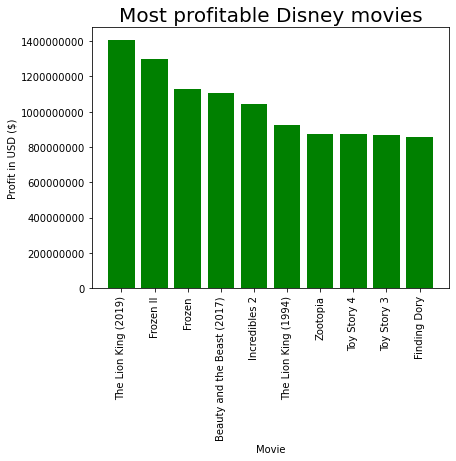

In [487]:
# Creating the 'Profit' column based on Budget and Box office columns
df.loc[(df['Box office (float)'].notnull())&(df['Budget (float)'].notnull()), 'Profit'] = df['Box office (float)'] - df['Budget (float)']

# Verifying if the "Profit' column was created
df.head()[['Box office (float)', 'Budget (float)', 'Profit' ]]

best_profit_movies = df.sort_values(by=['Profit'], ascending=False).head(10)

profits = best_profit_movies['Profit']
titles = best_profit_movies['Title']

plt.bar(titles, profits, color='g')

plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation='vertical')

plt.xlabel('Movie')
plt.ylabel('Profit in USD ($)')

plt.title('Most profitable Disney movies', size=20)
plt.show()

### The best profitable movie in our data is The Lion King (2019)

### Subtask: Best profit movie vs IMDb score

<ipython-input-503-37b59a924cc1>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  movie_profits.set_xticklabels(titles, rotation='vertical', size=8)


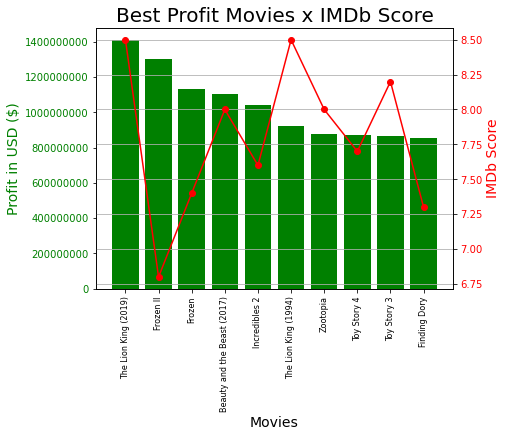

In [503]:
imdb = best_profit_movies['imdb']

fig, movie_profits = plt.subplots()


# movie_imdb_score and movie_profits have the same x axis
movie_imdb_score = movie_profits.twinx()

movie_profits.bar(titles, profits, color='g')
movie_imdb_score.plot(titles, imdb, color='r', linewidth=1.5, marker='.', markersize='12')

movie_profits.set_xlabel('Movies', size=14)
movie_profits.set_ylabel('Profit in USD ($)', color='g', size=14)
movie_imdb_score.set_ylabel('IMDb Score', color='r', size=14)

movie_profits.ticklabel_format(style='plain', axis='y')

movie_profits.tick_params(axis='y', labelcolor='g')
movie_imdb_score.tick_params(axis='y', labelcolor='r')

movie_profits.set_xticklabels(titles, rotation='vertical', size=8)

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

plt.title('Best Profit Movies x IMDb Score', size=20)
plt.grid()
plt.show()

## Question 2: The best duration for movies

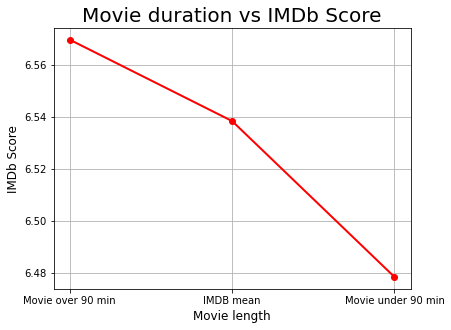

In [489]:
# IMDb mean score by movie duration
overall_imdb_mean = df.loc[(df['Running time (min)'].notnull())][['imdb']].mean(axis=0)
imdb_mean_under_90min = df.loc[(df['Running time (min)'].notnull())].loc[(df['Running time (min)'] <= 90)][['imdb']].mean(axis=0)
imdb_mean_over_90min = df.loc[(df['Running time (min)'].notnull())].loc[(df['Running time (min)'] > 90)][['imdb']].mean(axis=0)

x = ['Movie over 90 min', 'IMDB mean', 'Movie under 90 min'] #movie length
y = [float(imdb_mean_over_90min), float(overall_imdb_mean), float(imdb_mean_under_90min)]   #imdb per movie length 

plt.title('Movie duration vs IMDb Score', size=20)
plt.xlabel('Movie length', size=12)
plt.ylabel('IMDb Score', size=12)


plt.grid()
plt.plot(x,y, 'r', linewidth=2, marker='.', markersize='12')
plt.show()



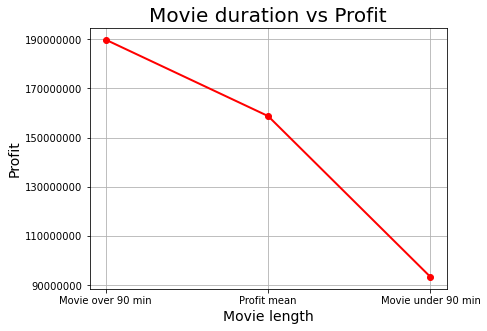

In [490]:
# Mean profit by movie duration
profit_overall_mean = df.loc[(df['Running time (min)'].notnull())][['Profit']].mean(axis=0)
profit_mean_under_90min = df.loc[(df['Running time (min)'].notnull())].loc[(df['Running time (min)'] <= 90)][['Profit']].mean(axis=0)
profit_mean_over_90min = df.loc[(df['Running time (min)'].notnull())].loc[(df['Running time (min)'] > 90)][['Profit']].mean(axis=0)

x = ['Movie over 90 min', 'Profit mean', 'Movie under 90 min'] #movie length
y = [float(profit_mean_over_90min), float(profit_overall_mean), float(profit_mean_under_90min)]   #imdb per movie length 

plt.title('Movie duration vs Profit', size=20)
plt.xlabel('Movie length', size=14)
plt.ylabel('Profit', size=14)

# new yticks, with the values between 90m and 190m  the min and max mean profit becomes clearer.
range_tick = range(70000000, 200000000, 20000000)

plt.yticks(range_tick)

plt.ticklabel_format(style='plain', axis='y')

plt.grid()
plt.plot(x,y, 'r', linewidth=2, marker='.', markersize='12')
plt.show()

### Answer to the question: Based on IMDb Score and in the Movie's profit, we can conclude that in both cases the best movie length is over 90 minutes.